In [ ]:
import cv2, math,json,geopy.distance, os, random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import fftpack
from sklearn import metrics

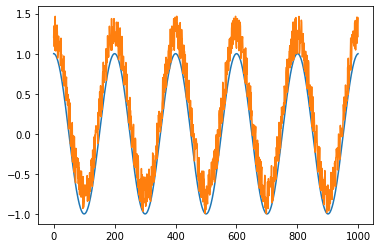

In [ ]:
# x = [math.sin(2*i*(3.14)) for i in np.arange(0,100,0.1)]
# x = [math.sin(0.1*i*(3.14)) for i in np.arange(0,100,0.1)]
y = [math.cos(0.1*i*(3.14)) for i in np.arange(0,100,0.1)]
z = [0.5*random.random()+math.cos(0.1*i*(3.14)) for i in np.arange(0,100,0.1)]
# plt.plot(x)
plt.plot(y)
plt.plot(z)

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
class dataproc:
  """A simple class for ranking detectors by speed and occupancy"""
  def __init__(self,path):
    self.path = path
    self.n = 1
    self.days = [2,3]

  def read_csv_format(self):
    df = pd.read_csv(self.path)
    df['datetime'] = pd.to_datetime(df['datetime'])
    
    return df
  
  def pick_random(self):
    # df is dataframe
    # n is the number of detectors to filter
    df = self.read_csv_format()
    unique_detectors = df['detector_id'].unique()
    select_detectors = random.sample(unique_detectors.tolist(),self.n)
    df_filter = df[df['detector_id'].isin(select_detectors)]
    return df_filter


  def visualize(self, df):
    return df['occupancy'].plot.hist(), df.plot(x='datetime',y='occupancy')

  def split_data(self,df):
    df['day'] = df['datetime'].dt.day 
    df['hour']= df['datetime'].dt.hour
    df = df[(df['hour']>=6) & (df['hour']<=20) ]
    return df[df['day']==self.days[0]],df[df['day']==self.days[1]]


In [ ]:
path = '/content/gdrive/My Drive/CVENG_8160/data/delay_bottleneck.csv'
dp = dataproc(path)

In [ ]:
df = dp.pick_random()

In [ ]:
df.head()

,detector_id,travelway,direction,loc,datetime,speed,volume,occupancy,congested,long,lat
277122,MI070W206.0D,70,West,205.2,2017-09-01 02:09:00,73.391304,2.000000,1.000000,0.0,-90.913399,38.806599
277123,MI070W206.0D,70,West,205.7,2017-09-01 02:09:00,72.521739,2.000000,1.000000,0.0,-90.913399,38.806599
277124,MI070W206.0D,70,West,206.2,2017-09-01 02:09:00,73.333333,2.111111,1.055556,0.0,-90.913399,38.806599
277125,MI070W206.0D,70,West,205.2,2017-09-01 02:44:00,73.013043,1.441304,1.928261,0.0,-90.913399,38.806599
277126,MI070W206.0D,70,West,205.7,2017-09-01 02:44:00,70.817391,1.321739,1.504348,0.0,-90.913399,38.806599


In [ ]:
df['day'] = df['datetime'].dt.day

In [ ]:

df_day1 = df[df['day']==1]
# df_day2 = df[df['day']==2]
# df_day3 = df[df['day']==3]
# df_day.shape

(771, 12)

In [ ]:
def get_day()

(<matplotlib.axes._subplots.AxesSubplot at 0x7fae3521e7b8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fae350e1a58>)

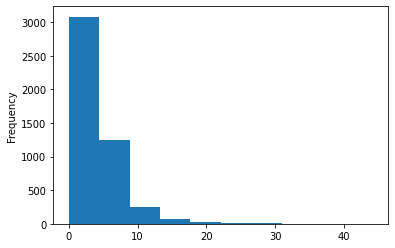

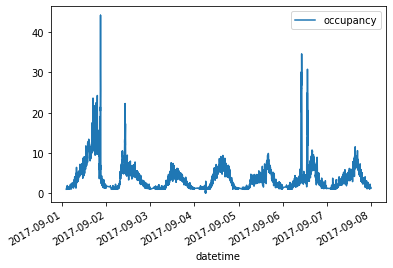

In [ ]:
dp.visualize(df)

In [ ]:
time_step = 1

In [ ]:
sign = df['occupancy'].values.tolist()

In [ ]:
# plt.plot(sample_freq)
# print (max(sample_freq))
# print (min(sample_freq))

In [ ]:
def fft_filter(sign,time_step, plot):
  #power of frequencies
  fft_sig = fftpack.fft(sign)
  power = np.abs(fft_sig)
  ## get corresponding frequecies
  sample_freq = fftpack.fftfreq((np.array(sign)).size, d=time_step)
  print (sample_freq)
  area = 

  # get only positive frequencies
  pos_mask = np.where(sample_freq > 0)
  # pos_mask = np.where((sample_freq > 0)&(sample_freq < 0.05))
  freqs = sample_freq[pos_mask]
  # # print (max(freqs),power[pos_mask].argmax())
  peak_indx = power[pos_mask].argmax()
  peak_freq = freqs[power[pos_mask].argmax()]
  print (peak_freq)

  ## with 509 points per day
  ## multiply 509 by peak_freq to get cycle per day. 

  # # print (peak_freq,power[pos_mask].max())
  # # plt.plot(sample_freq, power)
  # # print (power[pos_mask].mean())
  if plot:
    ## plot frequencies against strength
      plt.plot(sample_freq[pos_mask][0:100], power[pos_mask][0:100])
      # plt.plot(sample_freq, power)
      plt.show()

  # copy the frequency signal
  copy_freq_fft = fft_sig.copy()
  # # print ('peak frequency is: ' + str(peak_freq))
  
  ## select low frequencies
  copy_freq_fft[np.abs(sample_freq) >0.005] = 0
  # copy_freq_fft[np.abs(sample_freq) > peak_freq*1.5] = 0
  # copy_freq_fft[np.abs(sample_freq) > peak_freq/2] = 0
  lf_signal = fftpack.ifft(copy_freq_fft)
  return lf_signal

[ 0.          0.00021281  0.00042562 ... -0.00063843 -0.00042562
 -0.00021281]
0.0014896786550329857


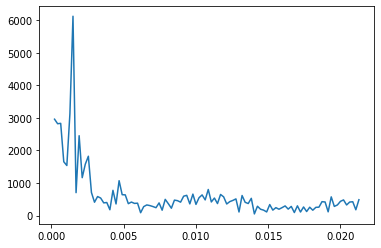

In [ ]:
lf_signal = fft_filter(sign,1, 1)

[ 0.          0.00021281  0.00042562 ... -0.00063843 -0.00042562
 -0.00021281]
0.0014896786550329857


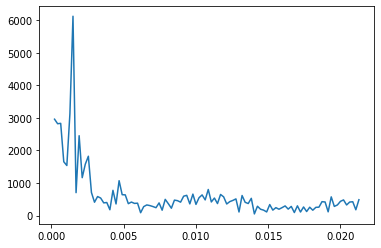

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


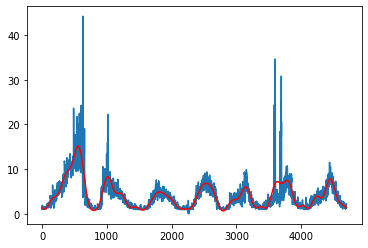

In [ ]:
lf_signal = fft_filter(sign,1, 1)
plt.plot(sign)
plt.plot(lf_signal,'r')

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


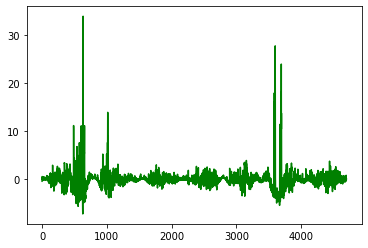

In [ ]:
plt.plot(sign-lf_signal,'g')


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:854: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
/usr/local/lib/python3.6/dist-packages/matplotlib/transforms.py:789: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)
/usr/local/lib/python3.6/dist-packages/matplotlib/transforms.py:1969: ComplexWarning: Casting complex values to real discards the imaginary part
  x, y = float(x), float(y)


(array([1.250e+02, 4.069e+03, 4.410e+02, 2.800e+01, 1.500e+01, 9.000e+00,
        6.000e+00, 4.000e+00, 1.000e+00, 1.000e+00]),
 array([-7.17867475+0.00000000e+00j, -3.06706941-3.84218086e-17j,
         1.04453594-7.68436172e-17j,  5.15614128-1.15265426e-16j,
         9.26774662-1.53687234e-16j, 13.37935196-1.92109043e-16j,
        17.4909573 -2.30530852e-16j, 21.60256264-2.68952660e-16j,
        25.71416798-3.07374469e-16j, 29.82577332-3.45796277e-16j,
        33.93737866-3.84218086e-16j]),
 <a list of 10 Patch objects>)

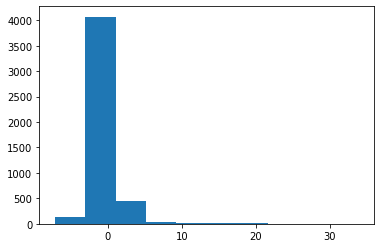

In [ ]:
plt.hist(sign-lf_signal)

(array([3.083e+03, 1.255e+03, 2.430e+02, 6.600e+01, 2.800e+01, 1.600e+01,
        6.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([ 0.  ,  4.42,  8.84, 13.26, 17.68, 22.1 , 26.52, 30.94, 35.36,
        39.78, 44.2 ]),
 <a list of 10 Patch objects>)

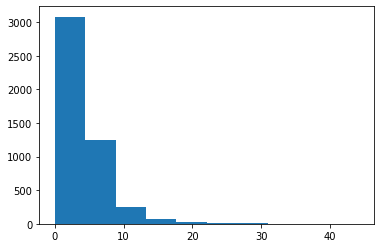

In [ ]:
plt.hist(sign)

In [ ]:
def get_low_freq(fft_sig,peak_freq, sample_freq, freqs,peak_indx):
  max_freq = max(freqs)
  lf_signals = []
  low_freqs = [0,peak_freq/4,peak_freq/2,peak_freq,peak_freq*2,peak_freq*4]
  print ('low frequency components\n')
  for cur_freq,next_freq in zip(low_freqs[0:-1],low_freqs[1:]):
    start_freq = cur_freq; end_freq = next_freq
    copy_freq_fft = fft_sig.copy()
    print ('frequency range is: ' +str(start_freq) +'-'+ str(end_freq))
    copy_freq_fft[np.abs(sample_freq) <start_freq] = 0
    copy_freq_fft[np.abs(sample_freq) >end_freq] = 0
    lf_signal = fftpack.ifft(copy_freq_fft)
    lf_signals.append(lf_signal)
  print ('\n')
  return lf_signals

def get_high_freq(fft_sig,peak_freq, sample_freq, freqs,peak_indx):

  max_freq = max(freqs)
  lf_signals = []
  low_freqs = [peak_freq*20,peak_freq*40,peak_freq*80,peak_freq*160,max_freq]
  print ('high frequency components\n')
  for cur_freq,next_freq in zip(low_freqs[0:-1],low_freqs[1:]):
    start_freq = cur_freq; end_freq = next_freq
    copy_freq_fft = fft_sig.copy()
    print ('frequency range is: ' +str(start_freq) +'-'+ str(end_freq))
    copy_freq_fft[np.abs(sample_freq) <start_freq] = 0
    copy_freq_fft[np.abs(sample_freq) >end_freq] = 0
    lf_signal = fftpack.ifft(copy_freq_fft)
    lf_signals.append(lf_signal)
  print ('\n')
  return lf_signals

def multiscale_fft(sign,time_step):
    fft_sig = fftpack.fft(sign)
    power = np.abs(fft_sig)
    ## get corresponding frequecies
    sample_freq = fftpack.fftfreq((np.array(sign)).size, d=time_step)
    pos_mask = np.where(sample_freq > 0)
    # pos_mask = np.where((sample_freq > 0)&(sample_freq < 0.05))
    freqs = sample_freq[pos_mask]
    # print (max(freqs),power[pos_mask].argmax())
    peak_indx = power[pos_mask].argmax()
    peak_freq = freqs[power[pos_mask].argmax()]

    low_filtered_sigs = get_low_freq(fft_sig,peak_freq, sample_freq, freqs,peak_indx)
    high_filtered_sigs = get_high_freq(fft_sig,peak_freq, sample_freq, freqs,peak_indx)
    return sample_freq, pos_mask, power, low_filtered_sigs,high_filtered_sigs

In [ ]:
sample_freq, pos_mask, power, low_filtered_sigs,high_filtered_sigs = multiscale_fft(sign,1)

low frequency components

frequency range is: 0-0.0003724196637582464
frequency range is: 0.0003724196637582464-0.0007448393275164928
frequency range is: 0.0007448393275164928-0.0014896786550329857
frequency range is: 0.0014896786550329857-0.0029793573100659713
frequency range is: 0.0029793573100659713-0.005958714620131943


high frequency components

frequency range is: 0.029793573100659713-0.05958714620131943
frequency range is: 0.05958714620131943-0.11917429240263885
frequency range is: 0.11917429240263885-0.2383485848052777
frequency range is: 0.2383485848052777-0.4998935943817834




/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


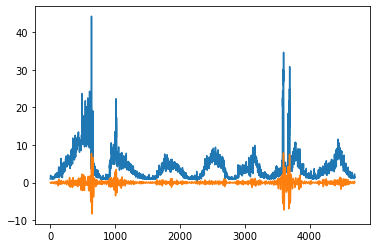

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


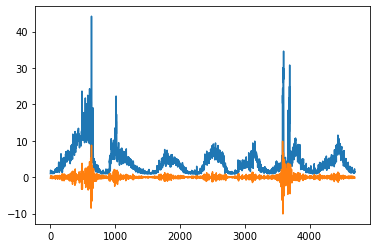

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


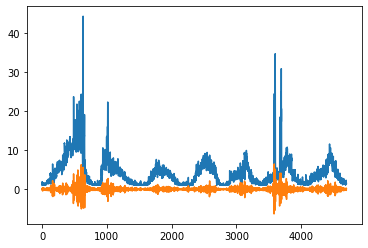

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


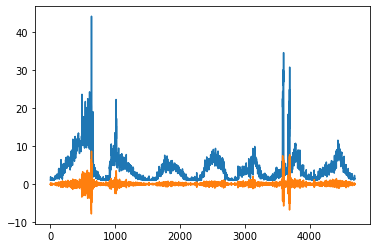

In [ ]:
for filt in high_filtered_sigs:
  plt.plot(sign)
  plt.plot(filt)

  plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


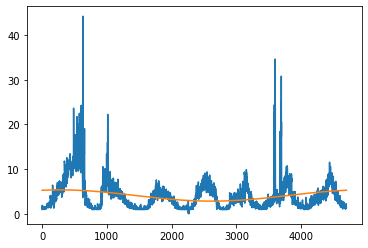

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


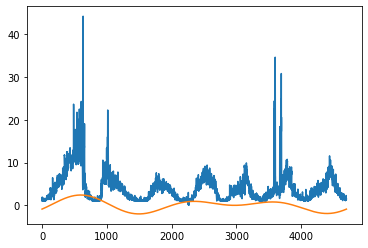

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


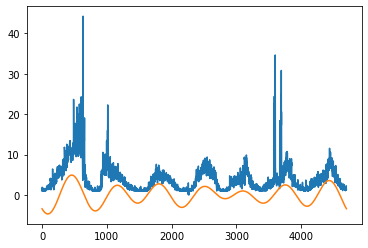

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


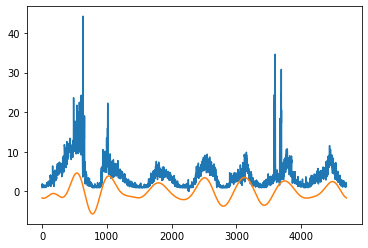

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


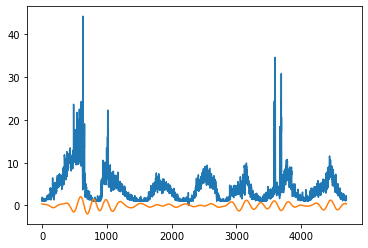

In [ ]:
for filt in low_filtered_sigs:
  plt.plot(sign)
  plt.plot(filt)
  plt.show()

#Individual Assignments
##1. Compare spectral density accross days using area under PSD
## 2. Use correlation to compare corresponding frequency ranges accross days. 

In [ ]:
## multiply power by the frequencies 

In [ ]:
freq = [1,2,3]
power = [4,5,6]
## area = sum[(1*4)+(2*5)+(3*6)]
area = freq+power
print (area)

[1, 2, 3, 4, 5, 6]


In [ ]:
day1 = ['low_freq_1_1','low_freq_2_1','low_freq_3_1']
day2 = ['low_freq_1_2','low_freq_2_2','low_freq_3_2']
day3 = ['low_freq_1_3','low_freq_2_3','low_freq_3_3']
corr_1 = corcoeff('low_freq_1_1','low_freq_1_2')